0)Environment check

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data

print("OpenCV:", cv2.__version__)

OpenCV: 4.13.0


In [ ]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


1) Load an image

Image shape (H, W, C): (1039, 779, 3) | dtype: uint8


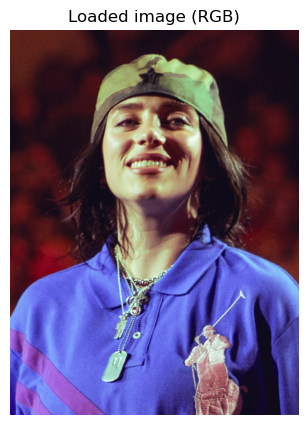

In [ ]:
# TODO: set this to your image file name if you have one, e.g. "fruit basket.jpg"
IMAGE_PATH = "/Users/230150/Downloads/favgirl.jpg"

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()

2) Image I/O basics

Task 2.1 — Inspect pixels

In [ ]:
# TODO (Task 2.1): print two pixel values
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])

Top-left pixel: [93 34 26]
Center pixel: [119  77  81]


**Task 2.1 (Answer):**  
- The 3 numbers in an RGB image represent the intensity values for the Red, Green, and Blue color channels respectively. Each value ranges from 0 to 255 (for uint8 images), where 0 means no intensity (black) and 255 means maximum intensity. The combination of these three values creates the final color of the pixel. For example, [255, 0, 0] would be pure red, [0, 255, 0] would be pure green, and [255, 255, 255] would be white.

### Task 2.2 — Save and re-load
Save the loaded image to disk as `output_saved.png`, then load it again and verify:
- shape is the same
- dtype is `uint8`

Reloaded shape: (1039, 779, 3) | dtype: uint8


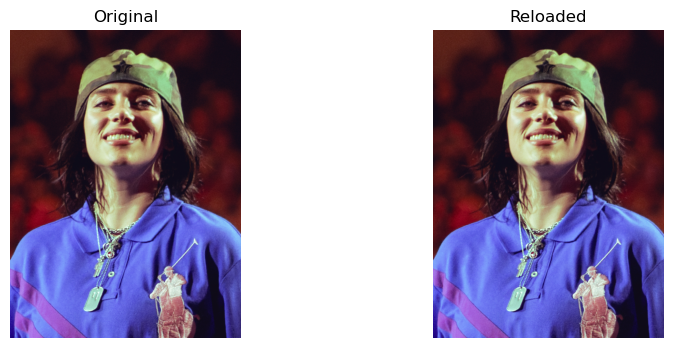

In [ ]:
# TODO (Task 2.2): save and reload
out_path = "output_saved.png"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")

## 3) Grayscale and binary images

### Task 3.1 — Convert to grayscale

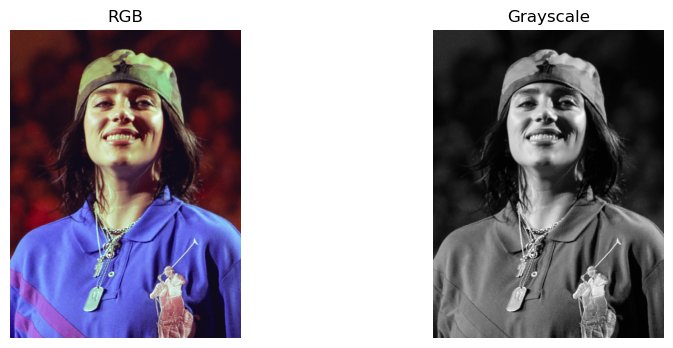

Gray shape: (1039, 779) | dtype: uint8


In [ ]:
# TODO (Task 3.1): grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)

### Task 3.2 — Threshold to binary
1. Create a binary image using a manual threshold (e.g., 128).
2. Create a binary image using Otsu's method.
3. Compare results (1–2 sentences).

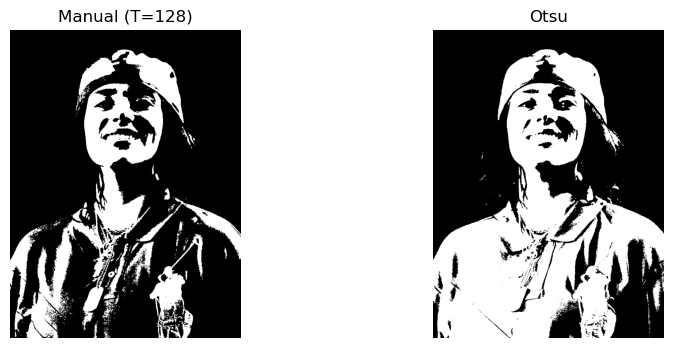

Otsu threshold chosen by OpenCV: 87.0


In [ ]:
# TODO (Task 3.2): thresholding
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

th_otsu, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", th_otsu)

**Task 3.2 (Answer):**  
- The manual threshold uses a fixed value (128) which may not be optimal for all images, potentially resulting in loss of detail or poor separation between foreground and background. Otsu's method automatically calculates the optimal threshold by minimizing intra-class variance, which typically produces better segmentation results that adapt to the image's specific intensity distribution. In most cases, Otsu's method will select a threshold value that better separates the two classes (background and foreground) in the image.

## 4) Cropping (ROI)

### Task 4.1 — Crop a region of interest
1. Pick an ROI using array slicing: `img[y1:y2, x1:x2]`.
2. Display original and cropped ROI.

Tip: choose coordinates that capture a meaningful object/face.

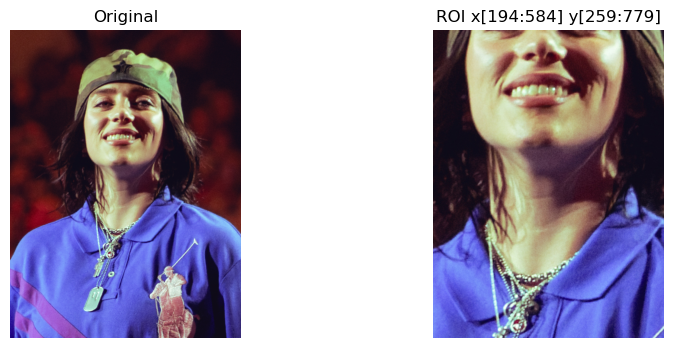

ROI shape: (520, 390, 3)


In [ ]:
# TODO (Task 4.1): set ROI coordinates
h, w = img.shape[:2]
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)

### Task 4.2 — Array slicing (conceptual)
Explain why the slicing is `img[y, x]` (row-major) and not `img[x, y]`.

**Task 4.2 (Answer):**  
- Images in NumPy are stored as multi-dimensional arrays in row-major order, where the first dimension represents rows (vertical/y-axis) and the second dimension represents columns (horizontal/x-axis). This follows the standard matrix notation convention where we access elements as array[row, column]. Therefore, when we slice an image, we use `img[y1:y2, x1:x2]` where y corresponds to rows (height) and x corresponds to columns (width). This is opposite to the typical (x, y) coordinate system used in geometry, but consistent with how matrices are indexed in mathematics and computer science.

## 5) Color spaces

### Task 5.1 — Convert RGB to HSV and visualize channels
1. Convert the image to HSV using OpenCV.
2. Display the H, S, and V channels as grayscale images.

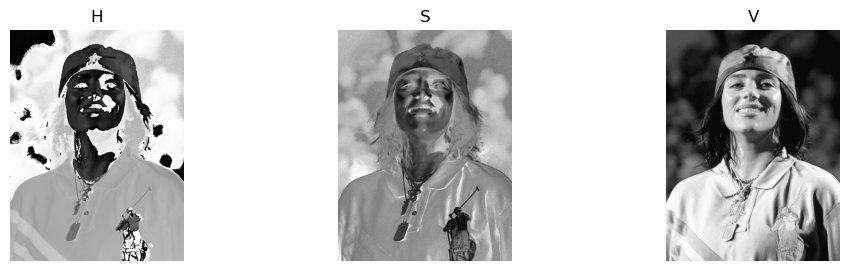

In [ ]:
#TODO (Task 5.1): HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i); plt.imshow(ch, cmap="gray"); plt.title(name); plt.axis("off")
plt.show()

## 6) Lab 2 — Basic arithmetic operations on images

This section follows the Lab 2 handout (Basic arithmetic operations on images): subtraction, addition, multiplication, division.

Use your loaded image. Operations should be done safely on `uint8` images (0–255). OpenCV functions (`cv2.add`, `cv2.subtract`, etc.) saturate at 0/255 automatically.

### 6.1 Subtracting an intensity (darkening)


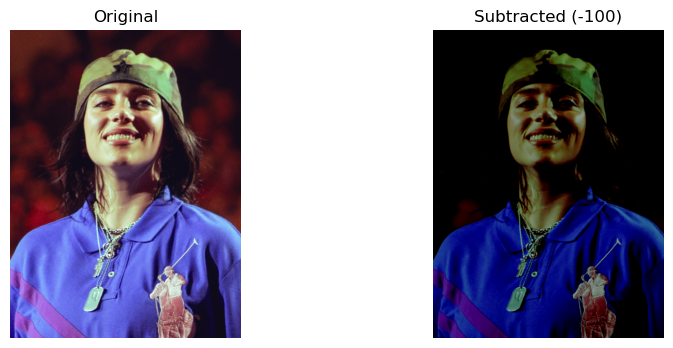

In [ ]:
# Provided example (edit the constant and re-run)
sub_val = 100  # TODO: try 30, 100, 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

**Task 6.1 (Answer):**
1. What happens when you increase `sub_val`?  
2. Why does the image get darker?  
- When you increase `sub_val`, the image becomes progressively darker, with more pixels reaching pure black (0). At very high values (e.g., 150+), much of the image becomes completely black. The image gets darker because we are subtracting a constant value from each pixel's intensity. Since pixel values are clamped at 0 (cv2.subtract saturates), subtracting reduces the brightness of all pixels proportionally, making the overall image appear darker. The darker the original pixel, the more likely it will become black after subtraction.

### 6.2 Subtract from *red channel only*
Modify only the **R** channel (in RGB) by subtracting a constant. Keep other channels unchanged.

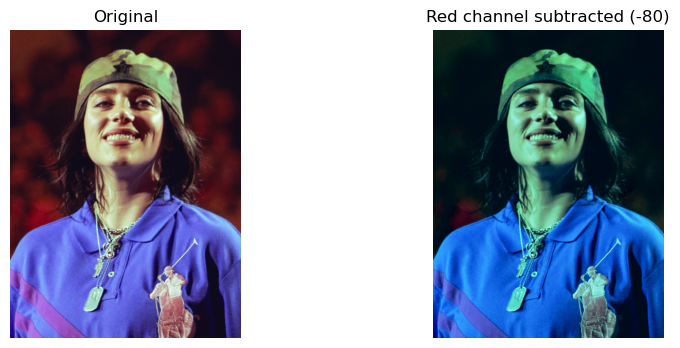

In [ ]:
# TODO (Task 6.2): subtract from Red channel only
sub_val_r = 80

img_red_only = img.copy()
# RGB: channel 0=R, 1=G, 2=B
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")

### 6.3 Adding an intensity (brightening)

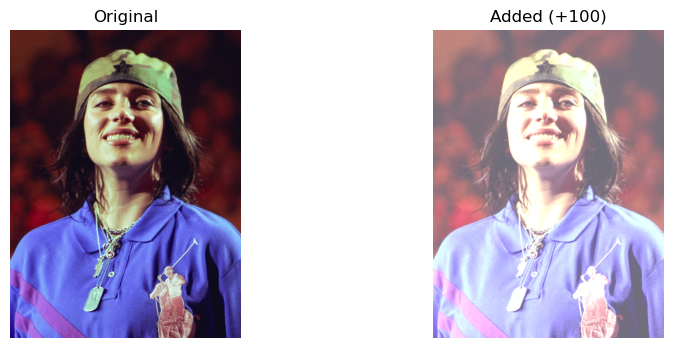

In [ ]:
add_val = 100  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

**Task 6.3 (Answer):**
1. What happens when you increase `add_val`?  
2. Why does the image get brighter?  
- When you increase `add_val`, the image becomes progressively brighter, with more pixels approaching pure white (255). At very high values (e.g., 150+), much of the image becomes washed out or completely white. The image gets brighter because we are adding a constant value to each pixel's intensity. Since pixel values are clamped at 255 (cv2.add saturates), adding increases the brightness of all pixels proportionally, making the overall image appear brighter. Pixels that are already bright will quickly reach the maximum value of 255 (white).

### 6.4 Add to *red channel only*

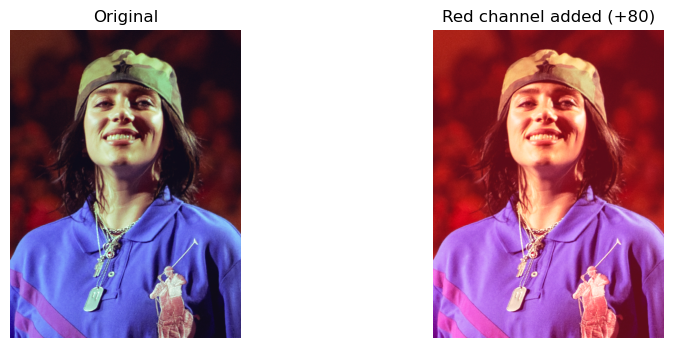

In [ ]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")

### 6.5 Multiplying by a constant (contrast/brightness change)

Use `cv2.multiply` with a float factor. Convert to `float32` first, then clip back to `uint8`.

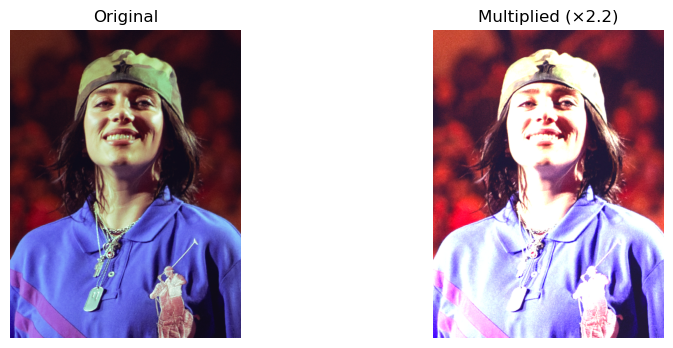

In [ ]:
# TODO: try factors like 0.5, 1.2, 2.0
factor = 2.2

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

**Task 6.5 (Answer):**
- Discuss the effect of multiplying by a factor > 1 vs < 1.  
- Multiplying by a factor greater than 1 increases contrast and brightness. Bright pixels become brighter and dark pixels remain relatively dark, creating a more dramatic difference between light and dark regions. However, this can lead to saturation (clipping at 255) in the bright areas, resulting in loss of detail. Multiplying by a factor less than 1 (e.g., 0.5) decreases both contrast and brightness, making the entire image darker and more uniform. The overall effect is similar to applying a global darkening, with all pixel values scaled down proportionally. Factors close to 1 produce subtle changes, while extreme values (very high or very low) can drastically alter the image appearance.

### 6.6 Dividing by a constant

Division by a number > 1 tends to darken; division by < 1 tends to brighten (but can saturate).

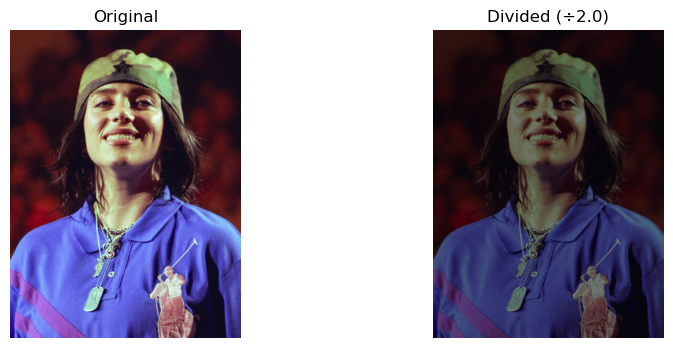

In [ ]:
# TODO: try divisors like 2.0, 3.0, 0.5
divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")

**Task 6.6 (Answer):**
- Compare dividing by a number greater than 1 versus less than 1.  
- Dividing by a number greater than 1 (e.g., 2.0 or 3.0) darkens the image by reducing all pixel intensities proportionally. For example, dividing by 2 cuts all pixel values in half, making the image appear significantly darker with reduced contrast. Dividing by a number less than 1 (e.g., 0.5) is mathematically equivalent to multiplying by its reciprocal (2.0 in this case), which brightens the image. This can lead to saturation at 255 for brighter pixels. Division by values greater than 1 is useful for darkening images uniformly, while division by values less than 1 should generally be avoided in favor of multiplication to achieve brightening effects more intuitively.

## 7) Mini-report (required)

Write a short report (150–250 words) describing:
- what you learned
- which operation(s) were most useful and why
- any issues you encountered (file paths, color order, dtype, etc.)

**Report:**  

This assignment gave me practical experience with basic digital image processing using OpenCV and NumPy. I learned how important it is to work correctly with color spaces, especially the difference between BGR format used in OpenCV and RGB format. Because of this, images sometimes need conversion before displaying or saving.
The most useful part for me was arithmetic operations such as addition, subtraction, multiplication, and division. These operations showed how simple mathematical changes can affect image brightness and contrast. I also learned that using OpenCV functions like cv2.add and cv2.subtract is safer for uint8 images because they prevent overflow and underflow problems.
The grayscale and binary image tasks helped me understand thresholding. Comparing manual thresholding with Otsu’s method showed that automatic algorithms can choose better values depending on the image.
Working with the HSV color space helped me understand how separating hue, saturation, and value can make image processing easier in some cases.
One difficulty was remembering that images use row-major indexing (img[y, x]). I also learned to be careful with data types like uint8 and float32 during calculations.
Overall, this assignment helped me understand how images are stored and modified using programming, which is important for future image processing work.
